##Project 1: An Analysis of World Happiness

In [2]:
## Import Dependencies
import matplotlib.pyplot as plt
import sklearn.datasets as dta
from scipy.stats import linregress
import pandas as pd
import scipy.stats as sts
import numpy as np
import random
import math as math
import seaborn as sns
import os

## A look into collective happiness for the Top 50 Happiest Countries in the World by Region


In [3]:
## Create Data file Paths
whr_2017_path = "../World_Happiness_Reports/2017.csv"
region_data_path = "Region_Data.csv"

## Read WHR and region data
whr_2017_df = pd.read_csv(whr_2017_path)
region_data_df = pd.read_csv(region_data_path)

## Display the data table for preview
whr_2017_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
## Display the data table for preview
region_data_df.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [5]:
## Top 50 Countries

In [6]:
## Sort/cut top 50 countries
top_50_sorted_df = whr_2017_df.sort_values("Happiness.Rank", ascending=True).head(50)

## Write data to CSV
#top_50_sorted_df.to_csv('Top_50_Carolina.csv')

## Display the data table for preview
#top_50_sorted_df.head()

In [7]:
## Add Regions to Top 50

In [8]:
## Combine the data into a single dataset 
merged_countries_regions_df = pd.merge(top_50_sorted_df, region_data_df, left_on="Country", right_on="name")

## Write data to CSV
#merged_countries_regions_df.to_csv('merged_countries_regions.csv')

## Display the data table for preview
merged_countries_regions_df.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,NO,NOR,578,ISO 3166-2:NO,Europe,Northern Europe,NaN,150.0,154.0,NaN
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,DK,DNK,208,ISO 3166-2:DK,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,IS,ISL,352,ISO 3166-2:IS,Europe,Northern Europe,NaN,150.0,154.0,NaN
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,CH,CHE,756,ISO 3166-2:CH,Europe,Western Europe,NaN,150.0,155.0,NaN
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,FI,FIN,246,ISO 3166-2:FI,Europe,Northern Europe,NaN,150.0,154.0,NaN
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,...,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,NaN,150.0,155.0,NaN
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,...,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19.0,21.0,NaN
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,...,NZ,NZL,554,ISO 3166-2:NZ,Oceania,Australia and New Zealand,NaN,9.0,53.0,NaN
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,...,SE,SWE,752,ISO 3166-2:SE,Europe,Northern Europe,NaN,150.0,154.0,NaN
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,...,AU,AUS,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,NaN,9.0,53.0,NaN


In [9]:
## Group Countries into Regions

In [10]:
## Drop countries 
clean_df = merged_countries_regions_df.drop(['Country'], axis=1)

## Using GroupBy Sub Region
grouped_regions_df = clean_df.groupby(['sub-region']).mean()

## Write data to CSV
#grouped_regions_df.to_csv('grouped_regions_df.csv')

## Rename Index Column
grouped_regions_df.index.name = 'Region'

## Display
#grouped_regions_df.head(5)

In [11]:
## Summary Statistics

In [12]:
## Happiness Scores for regions
regions_index = grouped_regions_df.index.get_level_values(0)
happiness_scores = grouped_regions_df['Happiness.Score']

# Display the data table for preview
#happiness_scores

In [13]:
## Sort and visualize Happiness Scores by region

In [14]:
## Sort Happiness Scores
happiness_scores = happiness_scores.sort_values(ascending=False)

## Display the data table for preview
#happiness_scores

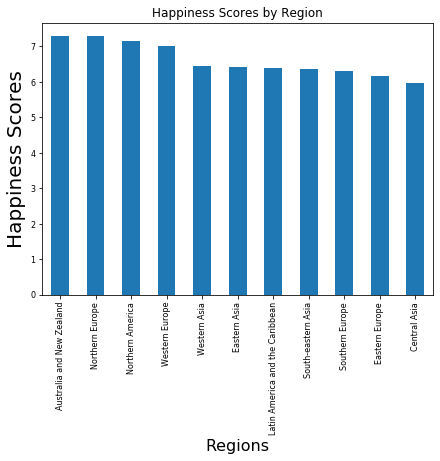

<Figure size 432x288 with 0 Axes>

In [15]:
## Visualize data
happiness_scores.plot(kind = 'bar',figsize=(7,5), fontsize=8)
plt.title('Happiness Scores by Region', fontsize=12)
plt.xlabel('Regions', fontsize=16)
plt.ylabel('Happiness Scores', fontsize=20)
plt.show()
plt.savefig("Happiness Scores By Region.png")

In [16]:
## Visualize Happiness Scores by Country

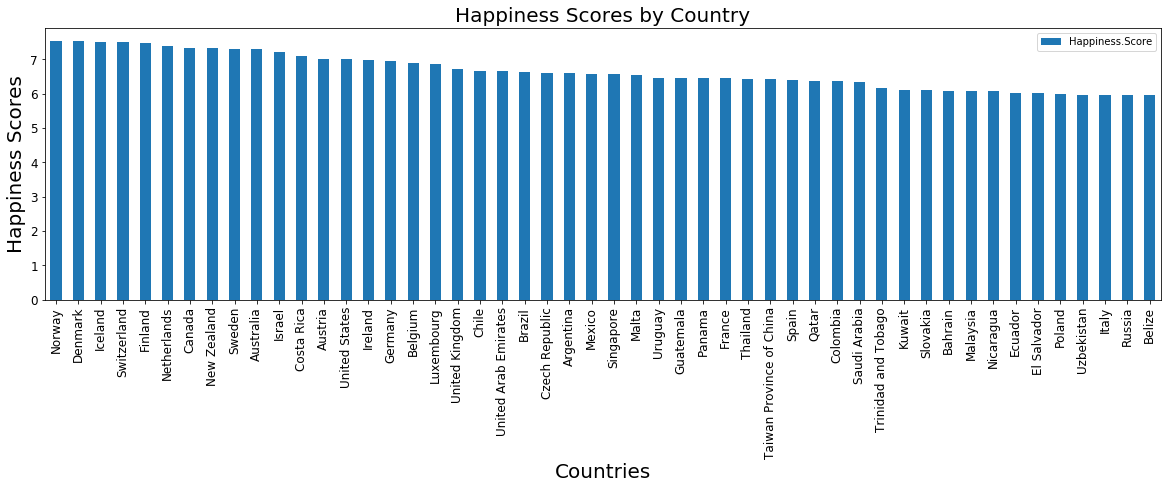

<Figure size 432x288 with 0 Axes>

In [17]:
## Visualize data
merged_countries_regions_df.plot(x='Country',y='Happiness.Score', kind = 'bar',figsize=(20,5), fontsize=12)
plt.title('Happiness Scores by Country', fontsize=20)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Happiness Scores', fontsize=20)
plt.show()
plt.savefig("Happiness Scores by Country.png")

A look into Suicide Rates and Family Status for the Top 50 Happiest Countries in the World

In [18]:
# Study data files
top_50_path = "../Suicide_Report/2017.csv"
suicide_rate_path = "../Suicide_Report/clean_suicide.csv"

# Read the mouse data and the study results
top_50 = pd.read_csv(top_50_path)
clean_suicide = pd.read_csv(suicide_rate_path)

# Combine the data into a single dataset 
merged_df = pd.merge(top_50, clean_suicide, on="Country")

# Display the data table for preview
merged_df.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Code,Death_rate
0,Norway,1.0,7.54,7.59,7.48,1.62,1.53,0.80,0.64,0.36,0.32,2.28,NOR,9.27
1,Denmark,2.0,7.52,7.58,7.46,1.48,1.55,0.79,0.63,0.36,0.40,2.31,DNK,8.80
2,Iceland,3.0,7.50,7.62,7.39,1.48,1.61,0.83,0.63,0.48,0.15,2.32,ISL,9.61
3,Switzerland,4.0,7.49,7.56,7.43,1.56,1.52,0.86,0.62,0.29,0.37,2.28,CHE,9.32
4,Finland,5.0,7.47,7.53,7.41,1.44,1.54,0.81,0.62,0.25,0.38,2.43,FIN,12.94
5,Netherlands,6.0,7.38,7.43,7.33,1.50,1.43,0.81,0.59,0.47,0.28,2.29,NLD,9.17
6,Canada,7.0,7.32,7.38,7.25,1.48,1.48,0.83,0.61,0.44,0.29,2.19,CAN,10.91
7,New Zealand,8.0,7.31,7.38,7.25,1.41,1.55,0.82,0.61,0.50,0.38,2.05,NZL,11.30
8,Sweden,9.0,7.28,7.34,7.22,1.49,1.48,0.83,0.61,0.39,0.38,2.10,SWE,11.08
9,Australia,10.0,7.28,7.36,7.21,1.48,1.51,0.84,0.60,0.48,0.30,2.07,AUS,11.05


In [19]:
#Clean Up of data for specific analysis 

#Rename columns 
merged_df.columns = ['Country', 'Rank', 'Happy_Score', 'Top_Whisker','Low_Whisker','GDP','Family','Life','Freedom','Generosity','Trust_Gov','Dystopia','Country_Code','Suicide_Rate']
merged_df.head(10)

#Pull specific columns that will be used in analysis
clean_df = merged_df[['Rank','Country_Code','Country','Happy_Score','Family','Suicide_Rate']]

#To round and format values correctly in table
#clean_df["Rank"] = clean_df["Rank"].map("#{:.0f}".format)
#clean_df
#getting a warning: value is trying to be set on a copy of a slice from a DataFrame.
clean_df.head(10)

,Rank,Country_Code,Country,Happy_Score,Family,Suicide_Rate
0,1.0,NOR,Norway,7.54,1.53,9.27
1,2.0,DNK,Denmark,7.52,1.55,8.80
2,3.0,ISL,Iceland,7.50,1.61,9.61
3,4.0,CHE,Switzerland,7.49,1.52,9.32
4,5.0,FIN,Finland,7.47,1.54,12.94
5,6.0,NLD,Netherlands,7.38,1.43,9.17
6,7.0,CAN,Canada,7.32,1.48,10.91
7,8.0,NZL,New Zealand,7.31,1.55,11.30
8,9.0,SWE,Sweden,7.28,1.48,11.08
9,10.0,AUS,Australia,7.28,1.51,11.05


In [20]:
#SUICIDE RATE: Create plots to compare suicide rates with top 50 countries 
#Scatter Plot with linear Regression and Correlation Coefficients
#Line Plots
#Bar Plots Vertical 
#Pie Chart 
#IF TIME PERMITS REGIONAL VIEW OF SUICICDE RATE VERSUS HAPPINESS

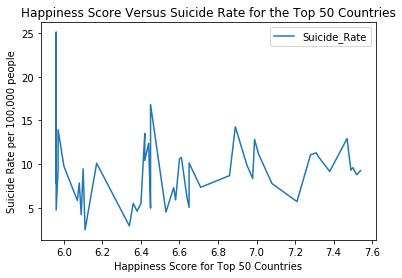

<Figure size 432x288 with 0 Axes>

In [21]:
#Line Plot of Suicide Rate vs. Country Happy Score 
clean_df.plot(x='Happy_Score',y='Suicide_Rate',kind ='line')
plt.title('Happiness Score Versus Suicide Rate for the Top 50 Countries')
plt.xlabel('Happiness Score for Top 50 Countries')
plt.ylabel('Suicide Rate per 100,000 people')
plt.show()
plt.savefig("Line Plot of Suicide Rate vs. Country Happy Score.png")

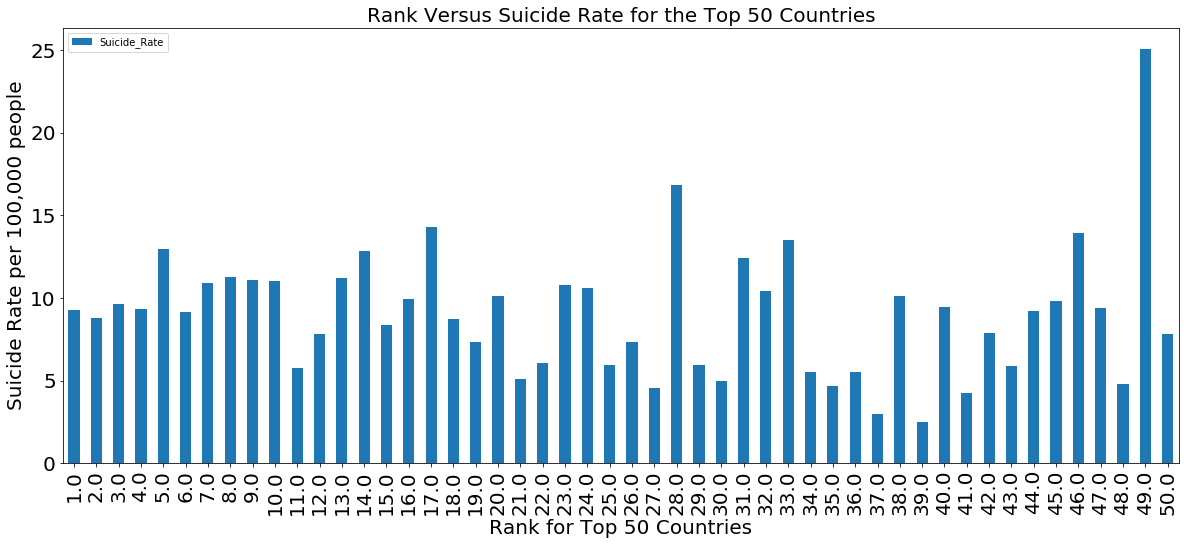

<Figure size 432x288 with 0 Axes>

In [22]:
#Bar Plot of Suicide Rate vs. Country Rank

#OPTION 1 TO VISUALIZE DATA
clean_df.plot(x ='Rank', y='Suicide_Rate', kind = 'bar',figsize=(20,8), fontsize=20)
plt.title('Rank Versus Suicide Rate for the Top 50 Countries', fontsize=20)
plt.xlabel('Rank for Top 50 Countries', fontsize=20)
plt.ylabel('Suicide Rate per 100,000 people', fontsize=20)
plt.show()
plt.savefig("Bar Plot of Suicide Rate vs. Country Rank.png")

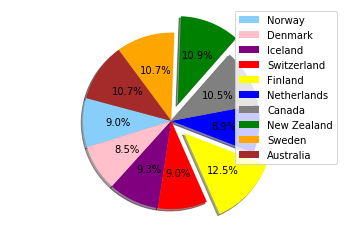

<Figure size 432x288 with 0 Axes>

In [23]:
#Pie Chart of TOP 10 Countries: Suicide Rate vs. Country Happy Score 
#Data layout
labels = 'Norway','Denmark','Iceland','Switzerland','Finland','Netherlands','Canada','New Zealand','Sweden','Australia'
sizes = [9.27,8.80,9.61,9.32,12.94,9.17,10.91,11.30,11.08,11.05]
colors = ['lightskyblue', 'pink', 'purple', 'red', 'yellow', 'blue', 'gray','green', 'orange','brown']
explode = (0, 0,0,0,0.2,0,0,0.2,0,0)
plt.pie(sizes,explode=explode, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 165)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()
plt.savefig("Pie Chart of Top 10 Countries: Suicide Rate vs. Country Happy Score.png")

---------------------------------------
The r-squared is: 0.011273778031702136
---------------------------------------


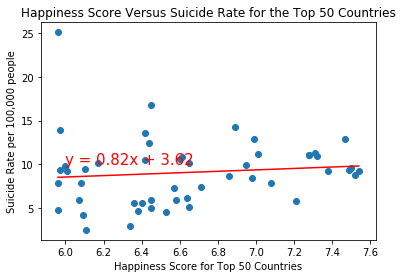

<Figure size 432x288 with 0 Axes>

In [24]:
#Scatter Plot of Suicide Rate vs. Country Happy Score 
# Add the linear regression equation and line to plot
x_values = clean_df['Happy_Score']
y_values = clean_df['Suicide_Rate']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Happiness Score Versus Suicide Rate for the Top 50 Countries')
plt.xlabel('Happiness Score for Top 50 Countries')
plt.ylabel('Suicide Rate per 100,000 people')
#correlation = sts.pearsonr('Happy_Score','Suicide_Rate')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
print("---------------------------------------")
print(f"The r-squared is: {rvalue**2}")
print("---------------------------------------")
plt.show()
plt.savefig("Scatter Plot of Suicide Rate Vs. Country Happy Score.png")

In [25]:
#FAMILY STATUS: Create plots to compare suicide rates with top 50 countries 
#Scatter Plot with linear Regression and Correlation Coefficients
#Line Plots
#Bar Plots Vertical 
#Pie Chart 
#IF TIME PERMITS REGIONAL VIEW OF FAMILY VERSUS HAPPINESS 

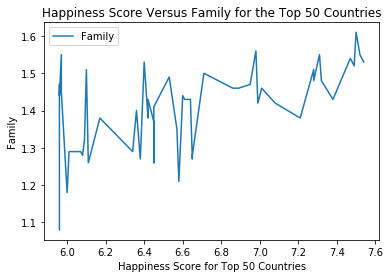

<Figure size 432x288 with 0 Axes>

In [26]:
#Line Plot of Family vs. Country Happy Score 
clean_df.plot(x='Happy_Score',y='Family',kind ='line')
plt.title('Happiness Score Versus Family for the Top 50 Countries')
plt.xlabel('Happiness Score for Top 50 Countries')
plt.ylabel('Family')
plt.show()
plt.savefig("Happiness Score Versus Family for the Top 50 Countries.png")

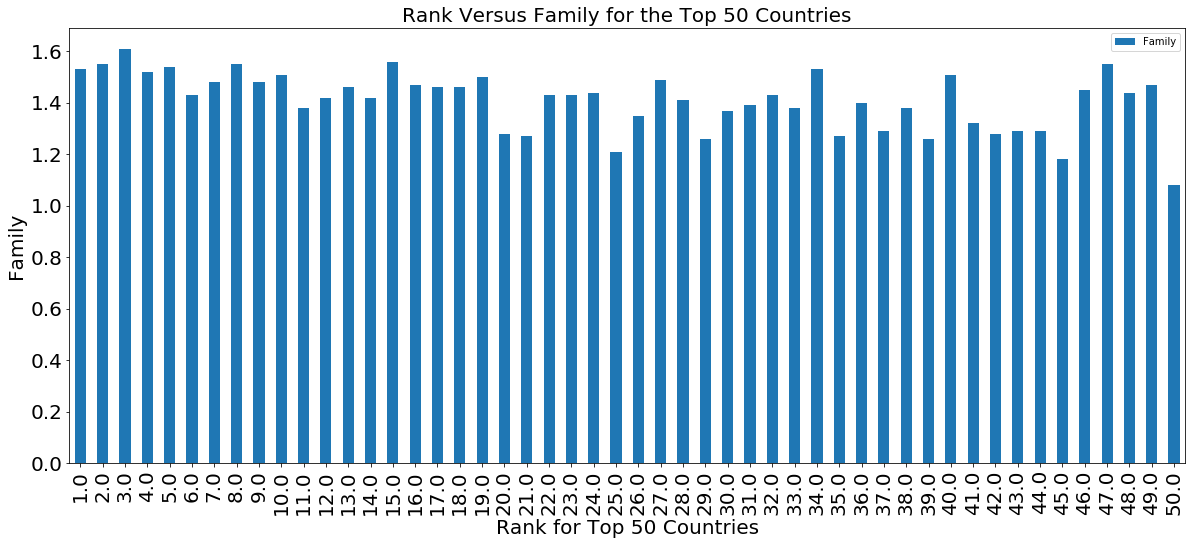

<Figure size 432x288 with 0 Axes>

In [27]:
#Bar Plot of Family vs. Country Rank
#OPTION 1 TO VISUALIZE DATA
clean_df.plot(x ='Rank', y='Family', kind = 'bar',figsize=(20,8), fontsize=20)
plt.title('Rank Versus Family for the Top 50 Countries', fontsize=20)
plt.xlabel('Rank for Top 50 Countries', fontsize=20)
plt.ylabel('Family', fontsize=20)
plt.show()
plt.savefig("Rank Versus Family for the Top 50 Countries.png")

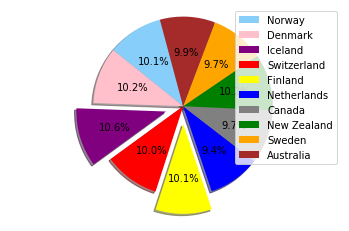

<Figure size 432x288 with 0 Axes>

In [28]:
#Pie Chart of TOP 10 Countries: Family vs. Country Happy Score 
#Data layout
labels = 'Norway','Denmark','Iceland','Switzerland','Finland','Netherlands','Canada','New Zealand','Sweden','Australia'
sizes = [1.53,1.55,1.61,1.52,1.54,1.43,1.48,1.55,1.48,1.51]
colors = ['lightskyblue', 'pink', 'purple', 'red', 'yellow', 'blue', 'gray','green', 'orange','brown']
explode = (0, 0,0.2,0,0.2,0,0,0,0,0)
plt.pie(sizes,explode=explode, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 105)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()
plt.savefig("Pie Chart of Top 10 Countries: Families vs. Country Happy Score.png")

---------------------------------------
The r-squared is: 0.3147588296592885
---------------------------------------


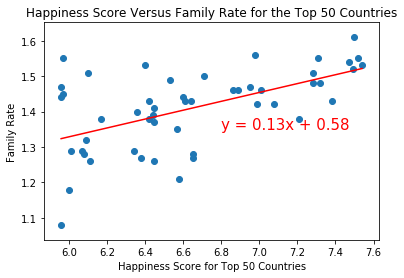

<Figure size 432x288 with 0 Axes>

In [29]:
#Scatter Plot of Family vs. Country Happy Score 
# Add the linear regression equation and line to plot
x_values = clean_df['Happy_Score']
y_values = clean_df['Family']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6.8,1.35),fontsize=15,color="red")
plt.title('Happiness Score Versus Family Rate for the Top 50 Countries')
plt.xlabel('Happiness Score for Top 50 Countries')
plt.ylabel('Family Rate')
#correlation = sts.pearsonr('Happy_Score','Family')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
print("---------------------------------------")
print(f"The r-squared is: {rvalue**2}")
print("---------------------------------------")
#print(line_eq)
plt.show()
plt.savefig("Happiness Score Versus Family Rate for the Top 50 Countries.png")

# An analysis of Life Expectancy and Population Size 

In [30]:
#importing the dataset
dataset2017=pd.read_csv('FINAL.csv')
dataset2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,region,Population
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe,5276968
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe,5764980
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe,343400
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe,8451840
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe,5508214


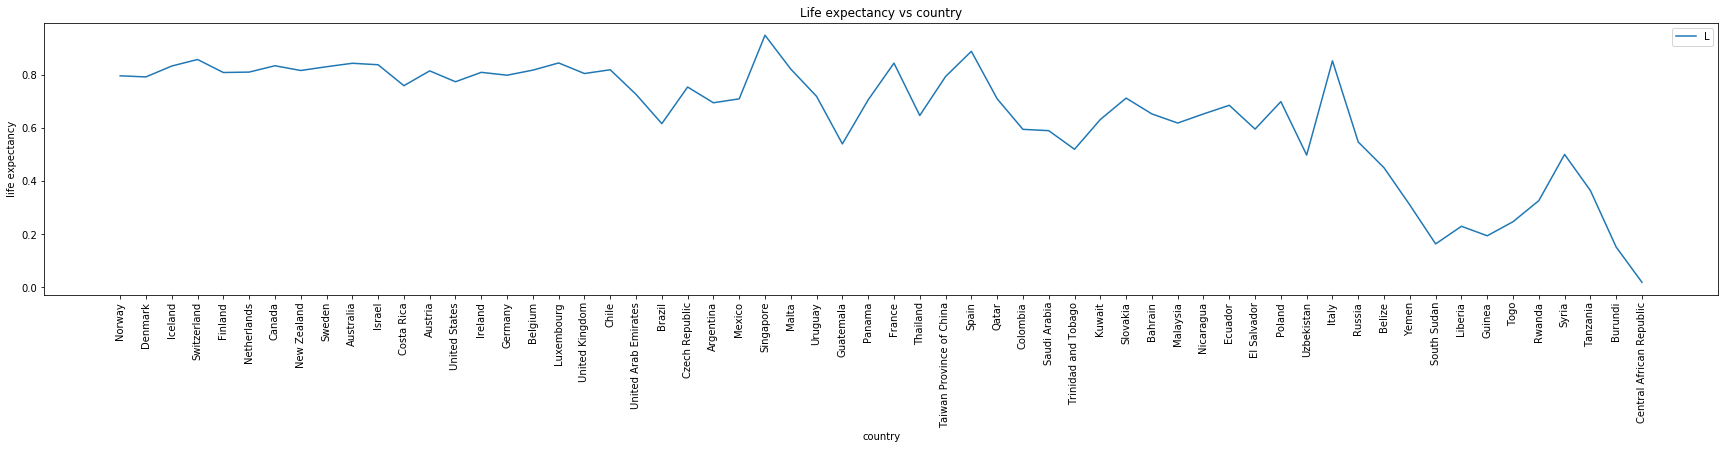

<Figure size 432x288 with 0 Axes>

In [31]:
#line chart of life expectancy for all countries

plt.figure(figsize=(30,5))
plt.plot(dataset2017['Country'],dataset2017['Health..Life.Expectancy.'])
plt.title('Life expectancy vs country')
plt.legend("Life Expectancy")
plt.xticks(rotation=90)
plt.xlabel('country')
plt.ylabel('life expectancy')
plt.show()
plt.savefig("Life expectancy vs country.png")

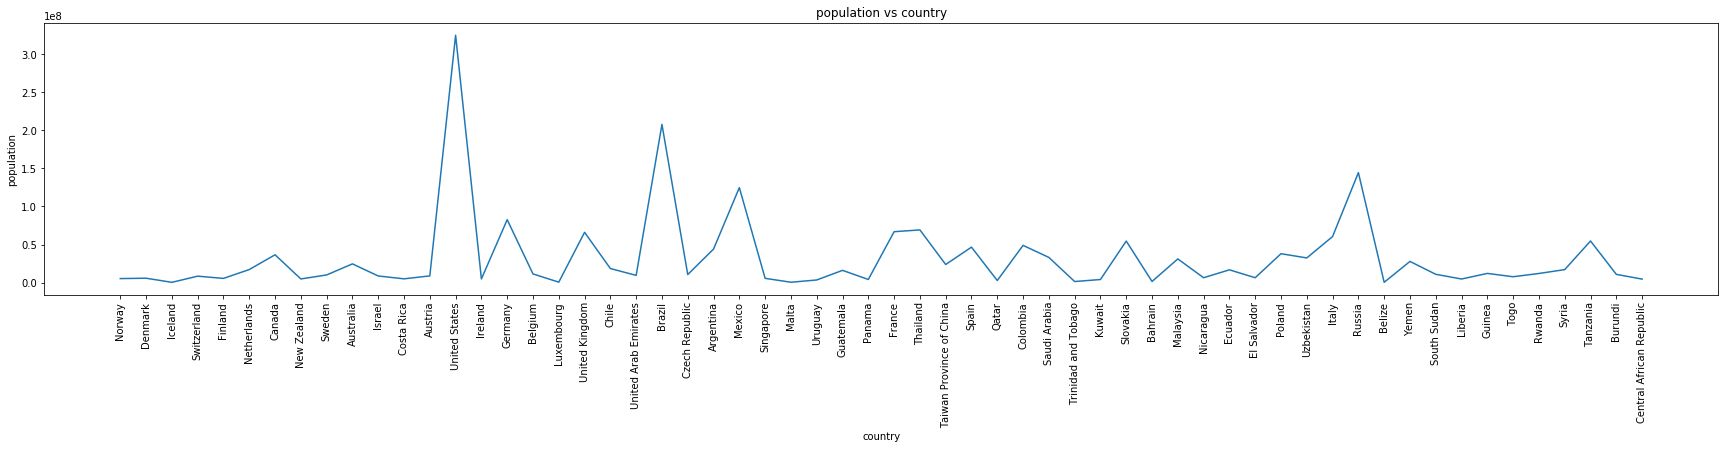

<Figure size 432x288 with 0 Axes>

In [32]:
#line chart of population size for all countries
plt.figure(figsize=(30,5))
plt.plot(dataset2017['Country'],dataset2017['Population'])
plt.title('population vs country')
plt.xticks(rotation=90)
plt.xlabel('country')
plt.ylabel('population')
plt.show()
plt.savefig("Population vs Country.png")

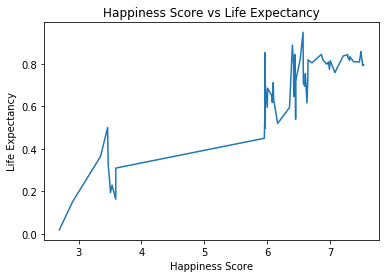

<Figure size 432x288 with 0 Axes>

In [33]:
#line chart of Happiness rank VS life expectancy 

plt.plot(dataset2017['Happiness.Score'],dataset2017['Health..Life.Expectancy.'])
plt.title('Happiness Score vs Life Expectancy')
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.show()
plt.savefig("Happiness Score vs Life Expectancy.png")

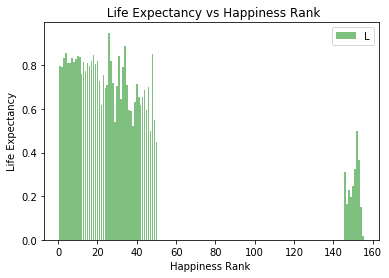

<Figure size 432x288 with 0 Axes>

In [34]:
x_axis= dataset2017["Happiness.Rank"]
y_axis= dataset2017["Health..Life.Expectancy."]
plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="center")
plt.title(' Life Expectancy vs Happiness Rank')
plt.xlabel('Happiness Rank ')
plt.ylabel('Life Expectancy')
plt.legend("Life Expectancy")
plt.show()
plt.savefig("life expectancy versus happiness rank histogram.png")

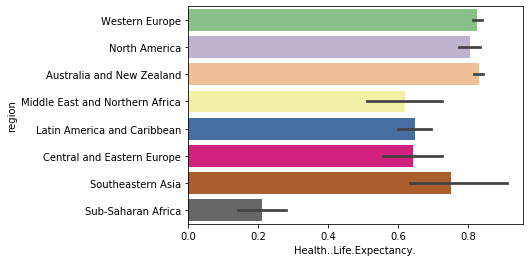

In [35]:
#bar graph of regions versus life expectancy
sns.barplot(x="Health..Life.Expectancy.", y="region", data=dataset2017, palette='Accent')
plt.savefig("bar graph of regions versus life expectancy1.png")

In [36]:
happycountries= pd.read_csv('2017PopulationTop50happycountries.csv')
happycountries.head()

,Country Name,Rank,Indicator Name,Population
0,Norway,1,"Population, total",5276968
1,Denmark,2,"Population, total",5764980
2,Iceland,3,"Population, total",343400
3,Switzerland,4,"Population, total",8451840
4,Finland,5,"Population, total",5508214


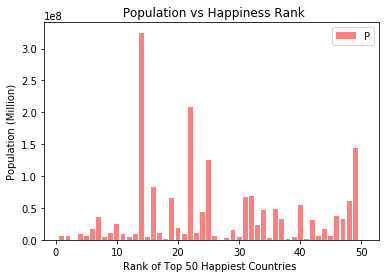

<Figure size 432x288 with 0 Axes>

In [37]:
x_axis= happycountries["Rank"]
y_axis= happycountries["Population"]
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.title(' Population vs Happiness Rank')
plt.xlabel('Rank of Top 50 Happiest Countries ')
plt.ylabel('Population (Million)')
plt.legend("Population")
plt.show()
plt.savefig("Population vs Happiness Rank.png")

In [38]:
unhappycountries= pd.read_csv('Populationofleast10happycountries.csv')
unhappycountries

,Country Name,Rank,Population
0,Central African Republic,1,4596028
1,Burundi,2,10827024
2,Tanzania,3,54663906
3,Syria,4,17068002
4,Rwanda,5,11980937
5,Togo,6,7698475
6,Guinea,7,12067539
7,Liberia,8,4702228
8,South Sudan,9,10910759
9,"Yemen, Rep.",10,27834821


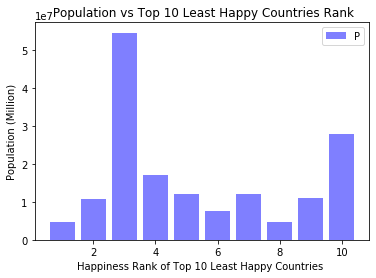

<Figure size 432x288 with 0 Axes>

In [39]:
x_axis= unhappycountries["Rank"]
y_axis= unhappycountries["Population"]
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.title(' Population vs Top 10 Least Happy Countries Rank')
plt.xlabel('Happiness Rank of Top 10 Least Happy Countries ')
plt.ylabel('Population (Million)')
plt.legend("Population")
plt.show()
plt.savefig("Population vs Top 10 Least Happy Countries Rank.png")

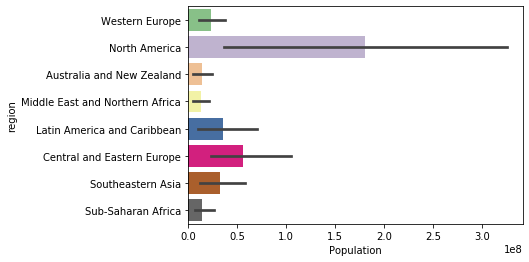

In [40]:
sns.barplot(x="Population", y="region", data=dataset2017, palette='Accent')
plt.savefig("Region vs pop.png")

In [41]:
#Correlation and linear regression between: 
#Happiness and life expectancy 
dataset2017['Happiness.Score'].corr(dataset2017['Health..Life.Expectancy.'])

0.9071593037581851

In [42]:
#correlation between Happiness and population
dataset2017['Happiness.Score'].corr(dataset2017['Population'])

0.10205182030147063

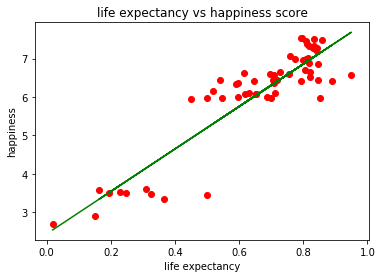

<Figure size 432x288 with 0 Axes>

In [76]:
#HAPPINESS AND LIFE EXPECTANCY-REGERSSION ANALYSIS

y=dataset2017.loc[:,'Happiness.Score'].values
x=dataset2017.loc[:,'Health..Life.Expectancy.'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2, random_state=0)



# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_predict=regressor.predict(X_test)

#Visualizing the training set results
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x),color='green')
plt.title('life expectancy vs happiness score')
plt.xlabel('life expectancy')
plt.ylabel('happiness')
plt.show()
plt.savefig("life expectancy vs happiness score.png")

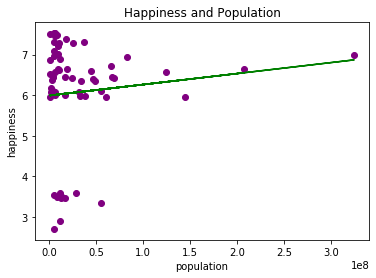

<Figure size 432x288 with 0 Axes>

In [77]:
#HAPPINESS AND POPULATION-REGRESSION ANALYSIS

y=dataset2017.loc[:,'Happiness.Score'].values
x=dataset2017.loc[:,'Population'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2, random_state=0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_predict=regressor.predict(X_test)

#Visualizing the training set results
plt.scatter(x,y, color='purple')
plt.plot(x, regressor.predict(x),color='green')
plt.title('Happiness and Population')
plt.xlabel('population')
plt.ylabel('happiness')
plt.show()
plt.savefig("Happiness and Population.png")

In [45]:
#[FROM THE ABOVE GRAPH AND ABOVE REGRESSION MODEL],WE CAN OBSERVE THAT THERE IS QUITE WEAK LINEAR RELATION BETWEEN
#POPULATION AND HAPPINESS INDEX.CORRELATION(0.10205182030147063) IS ALSO LESS WHICH IS PROVED ABOVE.

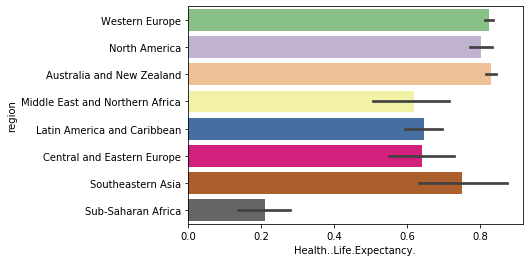

In [46]:
#bar graph of regions versus life expectancy
sns.barplot(x="Health..Life.Expectancy.", y="region", data=dataset2017, palette='Accent')
plt.savefig("bar graph of regions versus life expectancy.png")

In [47]:
#[Q1] Are there some regions that seem to live longer or less than others? 

#[A1] FROM THE ABOVE GRAPH i.e "REGION" vs "HEALTH LIFE EXPECTANCY", we can say that there
#are some regions that live longer than others and some regions that live shorter than others. 
#EXAMPLE: People of Sub-Saharan African region seems to have very less life expectancy
#when compared with other regions.

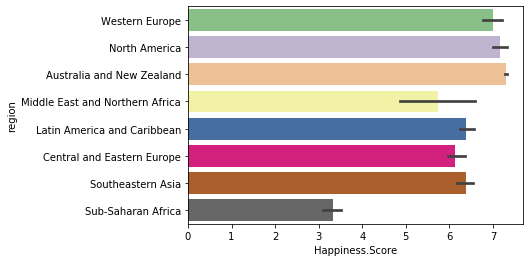

In [48]:
#bar graph of regions versus life expectancy
sns.barplot(x="Happiness.Score", y="region", data=dataset2017, palette='Accent')
plt.savefig("Bar graph of regions versus happiness score.png")

In [49]:
#[Q2]Do these countries have a lower or higher happiness score?

#[A2]Sub-Saharan African region seems to have very less life expectancy when compared with other regions and is also having less happiness index relatively.

The correlation between both factors is 0.9071593037581851


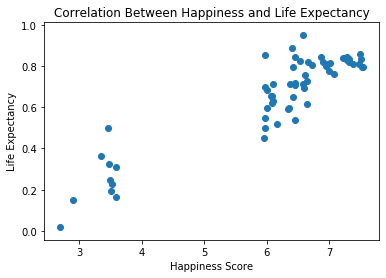

In [50]:
#CORRELATION BETWEEN Happiness and Life Expectancy 
correlation=dataset2017['Happiness.Score'].corr(dataset2017['Health..Life.Expectancy.'])
print(f"The correlation between both factors is {correlation}")
plt.scatter(dataset2017["Happiness.Score"],dataset2017["Health..Life.Expectancy."])
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Correlation Between Happiness and Life Expectancy")
plt.savefig("Correlation Between Happiness and Life Expectancy.png")

In [51]:
#[Q3] Is there a relationship between life expectancy and happiness?
#[A3] Statistically, we can see that correlation between happiness and life expectancy is quite high[0.9].
#It suggests a strong, positive association between happiness and life expectancy.

The correlation between both factors is 0.10205182030147063


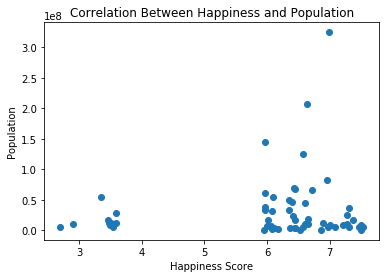

In [52]:
#CORRELATION BETWEEN Happiness and population
correlation=dataset2017['Happiness.Score'].corr(dataset2017['Population'])
print(f"The correlation between both factors is {correlation}")
plt.scatter(dataset2017["Happiness.Score"],dataset2017["Population"])
plt.xlabel("Happiness Score")
plt.ylabel("Population")
plt.title("Correlation Between Happiness and Population")
plt.savefig("Correlation Between Happiness and Population.png")

In [53]:
#[Q4]Is there a relationship between population size and happiness?

#[A4]Statistically, we can see that correlation between happiness and population size is quite low [0.102].
#this shows that happiness and population not well related.

In [54]:
#[CONCLUSION]

#[WE HAVE OBSERVED THE FOLLOWING POINTS]

#1] Happiness and life expectancy are strongly correlated.

#[2] Happiness and population are weakly correlated.

#[3] There are few regions which have very less life expectancy than other regions.

#[4] So,We understood that if a country improves its life expectancy, then its happiness index could increase. 

An Analysis of Government Trust and Freedom

In [55]:
#Top 50 countries and government trust 
#Bar Plot of Family vs. Country Rank

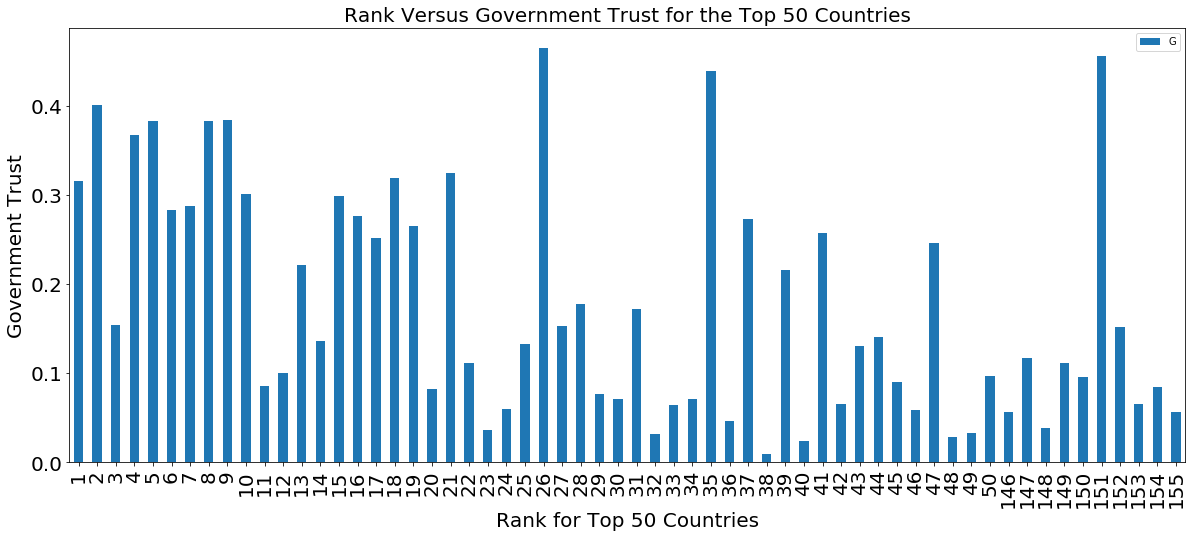

<Figure size 432x288 with 0 Axes>

In [61]:
dataset2017.plot(x ='Happiness.Rank', y='Trust..Government.Corruption.', kind = 'bar',figsize=(20,8), fontsize=20)
plt.title('Rank Versus Government Trust for the Top 50 Countries', fontsize=20)
plt.xlabel('Rank for Top 50 Countries', fontsize=20)
plt.ylabel('Government Trust', fontsize=20)
plt.legend('Government Trust')
plt.show()
plt.savefig("Images/Rank Versus Government Trust for the Top 50 Countries.png")

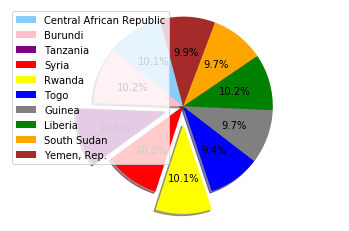

<Figure size 432x288 with 0 Axes>

In [64]:
#Pie Chart of TOP Least 10 Countries: Government Trust vs. Country Happy Score 
#Data layout
labels = 'Central African Republic','Burundi','Tanzania','Syria','Rwanda','Togo','Guinea','Liberia','South Sudan','Yemen, Rep.'
sizes = [1.53,1.55,1.61,1.52,1.54,1.43,1.48,1.55,1.48,1.51]
colors = ['lightskyblue', 'pink', 'purple', 'red', 'yellow', 'blue', 'gray','green', 'orange','brown']
explode = (0, 0,0.2,0,0.2,0,0,0,0,0)
plt.pie(sizes,explode=explode, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 105)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()
plt.savefig("Images/Pie Chart of Top 10 Least Countries: Government Trust vs. Country Happy Score.png")

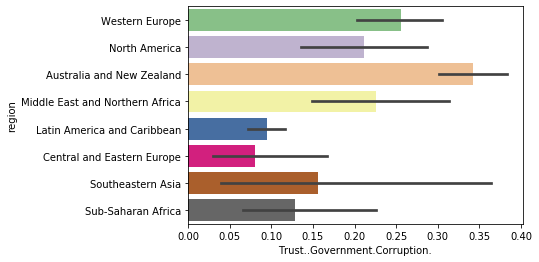

In [65]:
#bar graph of regions versus government trust
sns.barplot(x="Trust..Government.Corruption.", y="region", data=dataset2017, palette='Accent')
plt.savefig("Images/bar graph of regions versus government trust.png")

In [ ]:
#Australia and New Zealand region seems to have higher government trust when compared with other regions while Central and Eastern Europe have the lowest government trust rate. 

In [66]:
#Correlation and linear regression between: 
#Happiness and life expectancy 
dataset2017['Happiness.Score'].corr(dataset2017['Trust..Government.Corruption.'])

0.36065494004123544

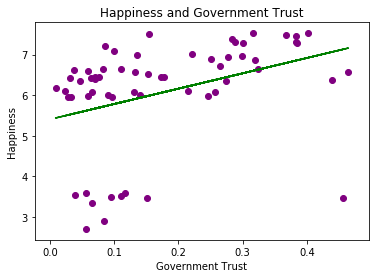

<Figure size 432x288 with 0 Axes>

In [67]:
#HAPPINESS AND GOVERNMENT TRUST-REGRESSION ANALYSIS

y=dataset2017.loc[:,'Happiness.Score'].values
x=dataset2017.loc[:,'Trust..Government.Corruption.'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2, random_state=0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_predict=regressor.predict(X_test)

#Visualizing the training set results
plt.scatter(x,y, color='purple')
plt.plot(x, regressor.predict(x),color='green')
plt.title('Happiness and Government Trust')
plt.xlabel('Government Trust')
plt.ylabel('Happiness')
plt.show()
plt.savefig("Images/Happiness and Government Trust.png")

In [ ]:
#[FROM THE ABOVE GRAPH AND ABOVE REGRESSION MODEL],WE CAN OBSERVE THAT THERE IS QUITE WEAK LINEAR RELATION BETWEEN
#GOVERNMENT TRUST AND HAPPINESS INDEX.CORRELATION(0.0.36065494004123544) IS ALSO LESS WHICH IS PROVED ABOVE.

The correlation between both factors is 0.36065494004123544


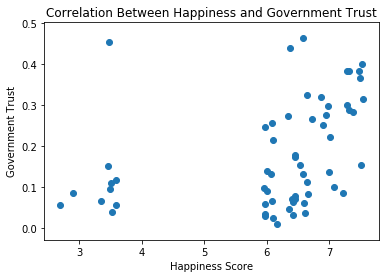

In [69]:
#Correlation between Government Trust and Happiness Score
#Use scatter plot to visualize the data
correlation=dataset2017['Happiness.Score'].corr(dataset2017['Trust..Government.Corruption.'])
print(f"The correlation between both factors is {correlation}")
plt.scatter(dataset2017["Happiness.Score"],dataset2017["Trust..Government.Corruption."])
plt.xlabel("Happiness Score")
plt.ylabel("Government Trust")
plt.title("Correlation Between Happiness and Government Trust")
plt.savefig("Images/Correlation Between Happiness and Government Trust.png")

In [ ]:
#[Q2]Does more or less trust in the government have a relationship to happiness? 
we can see that correlation between happiness and trust in government is quite low [0.360].
That indicates that happiness and trust in government are not well related.

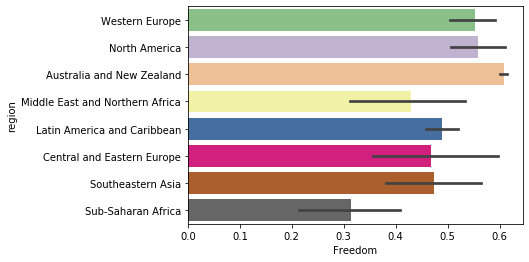

In [79]:
#bar graph of regions versus freedom
sns.barplot(x="Freedom", y="region", data=dataset2017, palette='Accent')
plt.savefig("Images/bar graph of regions versus freedom.png")

The correlation between both factors is 0.7296060864752424


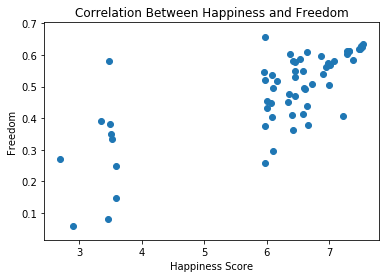

In [71]:
#Correlation between Freedom and Happiness Score
#Use scatter plot to visualize the data
correlation=dataset2017['Happiness.Score'].corr(dataset2017['Freedom'])
print(f"The correlation between both factors is {correlation}")
plt.scatter(dataset2017["Happiness.Score"],dataset2017["Freedom"])
plt.xlabel("Happiness Score")
plt.ylabel("Freedom")
plt.title("Correlation Between Happiness and Freedom")
plt.savefig("Images/Correlation Between Happiness and Freedom.png")

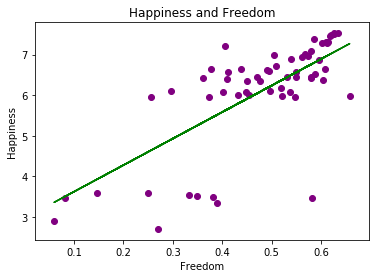

<Figure size 432x288 with 0 Axes>

In [78]:
#HAPPINESS AND FREEDOM ANALYSIS

y=dataset2017.loc[:,'Happiness.Score'].values
x=dataset2017.loc[:,'Freedom'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2, random_state=0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_predict=regressor.predict(X_test)

#Visualizing the training set results
plt.scatter(x,y, color='purple')
plt.plot(x, regressor.predict(x),color='green')
plt.title('Happiness and Freedom')
plt.xlabel('Freedom')
plt.ylabel('Happiness')
plt.show()
plt.savefig("Images/Happiness and Freedom.png")

# [Q1] Do certain regions seem more happy or less happy with freedom?
FROM THE ABOVE GRAPHS, there are some regions where people have more freedom than others and some regions where people have less. 
People of Sub-Saharan African region seems to have less freedom when compared with other regions, while people of Australia and New Zealand have more freedom.  
Statictically, we can see that correlation between happiness and freedom is strong [0.7296].
That indicates that happiness and freedom are well related.